In [1]:
import matplotlib.pyplot as plt
import sympy as sy
import numpy as np

a = 9.81
N = 100
n = 1000
finish = 4
x = [0]
v = [0]
t = [0]
step = 4/N

In [2]:
for i in range(N):
    x.append(x[i] + v[i]*step) 
    v.append(v[i] + a*step) 
    t.append(t[i]+step)


In [3]:
x = np.array(x)
v = np.array(v)
t = np.array(t)

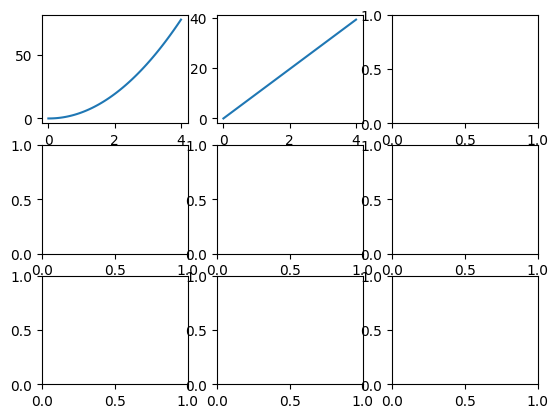

In [4]:
figure, axis = plt.subplots(3, 3)

axis[0, 0].plot(t, x, linestyle="-")
axis[0, 1].plot(t, v, linestyle="-")

In [5]:
v[75]

29.429999999999957

In [6]:
x2 = [0]
v2 = [0]
t2 = [0]
step2 = 4/n

In [7]:
for i in range(n):
    x2.append(x2[i] + v2[i]*step2) 
    v2.append(v2[i] + a*step2) 
    t2.append(t2[i]+step2)

x2 = np.array(x2)
v2 = np.array(v2)
t2 = np.array(t2)

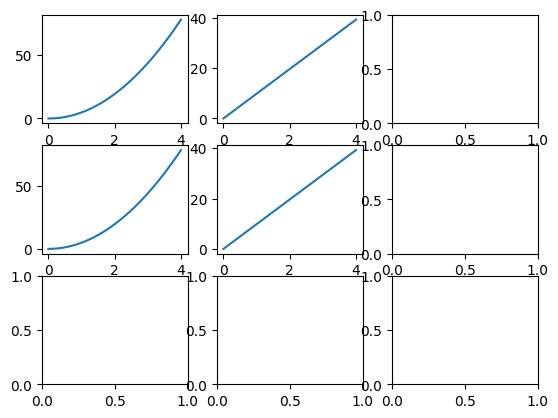

In [8]:
axis[1, 0].plot(t2, x2, linestyle="-")
axis[1, 1].plot(t2, v2, linestyle="-")
figure

In [9]:
rt, rx, rv = sy.symbols("rt, rx, rv")
rx = a/2 * rt **2
rv = a*rt
rx = sy.lambdify(rt,rx,"numpy")
rv = sy.lambdify(rt,rv,"numpy")
rt = np.linspace(0, 4, 1000)

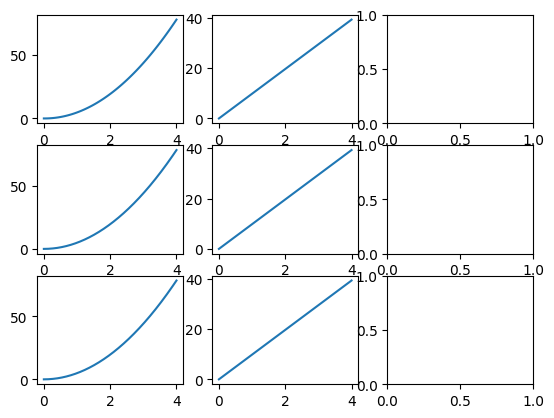

In [10]:
axis[2,0].plot(rt, rx(rt), linestyle="-")
axis[2,1].plot(rt, rv(rt), linestyle="-")
figure

In [11]:
x[75]

43.55639999999998

In [12]:
x2[750]

44.08613999999981

In [13]:
rx(3)

44.145

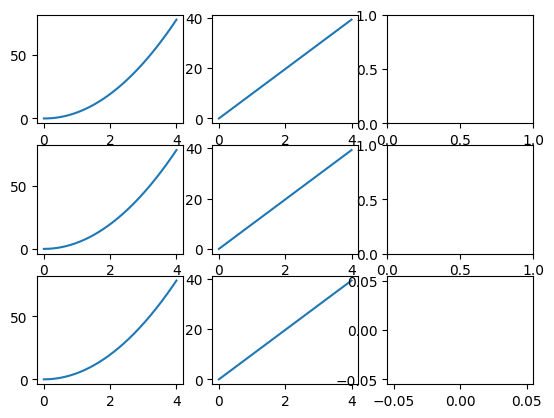

In [14]:
steperror = []
T_final = 2
dt = T_final/10000
x3 = np.zeros(n)
v3 = np.zeros(n)
t3 = np.linspace(0, T_final, n) 

for step in range(1, n):  # Loop through each step
    for i in range(n):
        x3[i] += v3[i] * dt
        v3[i] += a * dt

    index = int(2 / dt)
    if index < len(x3):
        steperror.append(abs(rx(2) - x3[index]))
    else:
        steperror.append(np.nan)
t3 = t3[:len(steperror)]
steperror= np.array(steperror)
steperror= steperror*100000
axis[2,2].plot(t3, steperror, linestyle="-")
figure